## Importing Dependencies

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

## Initializing MediaPipe


In [2]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Function to extract landmarks using MediaPipe
def extract_landmarks(image):
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_hand_landmarks:
        landmarks = []
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                landmarks.append(landmark.x)
                landmarks.append(landmark.y)
                landmarks.append(landmark.z)
        return landmarks
    return None


## Data Loading and Validation

In [3]:
X, y = [], []
dataset_path = 'new-data'

#Printing the dataset path
print(f"Dataset path: {dataset_path}")

# Listing the dataset directory
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    
    # Printing each label directory being processed
    print(f"Processing label directory: {label_path}")
    
    # Checking if the label_path is a directory
    if os.path.isdir(label_path):
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            
            # Print each image path being processed
            print(f"Processing image: {img_path}")
            
            image = cv2.imread(img_path)
            landmarks = extract_landmarks(image)
            if landmarks:
                X.append(landmarks)
                y.append(label)
    else:
        print(f"Skipped non-directory: {label_path}")

X = np.array(X)
y = np.array(y)

Dataset path: new-data
Processing label directory: new-data\A
Processing image: new-data\A\A_1.jpg
Processing image: new-data\A\A_10.jpg
Processing image: new-data\A\A_10DW.jpg
Processing image: new-data\A\A_10F.jpg
Processing image: new-data\A\A_11.jpg
Processing image: new-data\A\A_11DW.jpg
Processing image: new-data\A\A_11F.jpg
Processing image: new-data\A\A_12.jpg
Processing image: new-data\A\A_12DW.jpg
Processing image: new-data\A\A_12F.jpg
Processing image: new-data\A\A_13.jpg
Processing image: new-data\A\A_13DW.jpg
Processing image: new-data\A\A_13F.jpg
Processing image: new-data\A\A_14.jpg
Processing image: new-data\A\A_14DW.jpg
Processing image: new-data\A\A_14F.jpg
Processing image: new-data\A\A_15.jpg
Processing image: new-data\A\A_15DW.jpg
Processing image: new-data\A\A_15F.jpg
Processing image: new-data\A\A_16.jpg
Processing image: new-data\A\A_16DW.jpg
Processing image: new-data\A\A_16F.jpg
Processing image: new-data\A\A_17.jpg
Processing image: new-data\A\A_17DW.jpg
Proc

## Data visualization


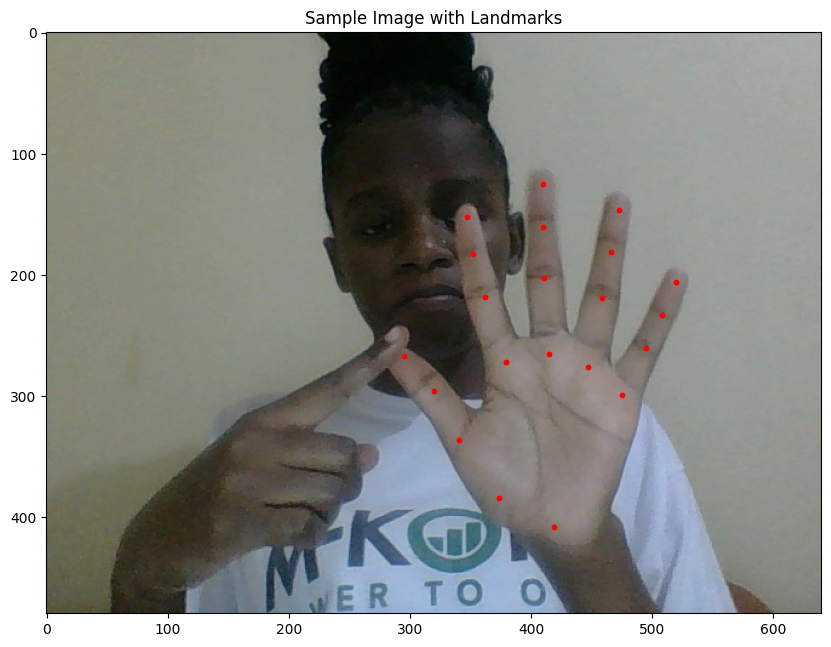

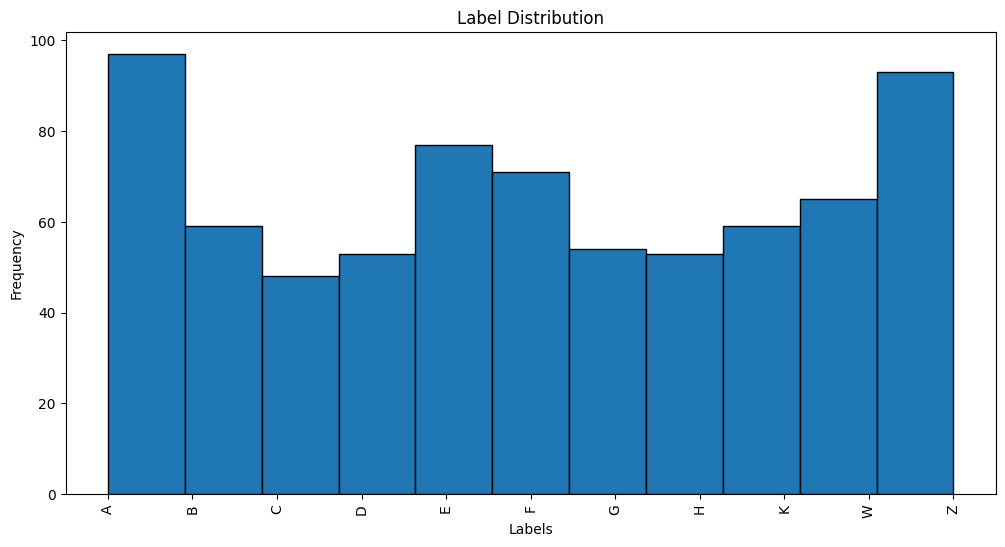

In [4]:
# Displaying a sample image with landmarks
def display_sample_image_with_landmarks(image_path, landmarks):
    image = cv2.imread(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for i in range(0, len(landmarks), 3):
        plt.scatter(landmarks[i] * image.shape[1], landmarks[i + 1] * image.shape[0], c='r', s=10)
    plt.title('Sample Image with Landmarks')
    plt.show()

# Displaying the first image with landmarks
if X.size > 0:
    display_sample_image_with_landmarks(os.path.join(dataset_path, y[0], os.listdir(os.path.join(dataset_path, y[0]))[0]), X[0])

# Displaying a histogram of label distribution
def display_label_distribution(labels):
    plt.figure(figsize=(12, 6))
    plt.hist(labels, bins=len(np.unique(labels)), edgecolor='black')
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

# Displaying the label distribution
if y.size > 0:
    display_label_distribution(y)


In [5]:
# Creating a DataFrame of the data
df = pd.DataFrame(X)
df['label'] = y

# Displaying the first few rows of the DataFrame
print(df.head())

          0         1             2         3         4         5         6  \
0  0.654328  0.849873  3.805741e-07  0.583801  0.800585 -0.037871  0.532005   
1  0.584768  0.812418  6.410171e-07  0.506223  0.770459 -0.030757  0.447109   
2  0.404040  1.011550  9.801237e-07  0.313855  0.960616 -0.053390  0.252951   
3  0.587228  0.851004  4.448828e-07  0.492059  0.785070 -0.024236  0.422197   
4  0.316235  1.015145  9.167411e-07  0.223942  0.959365 -0.049411  0.162871   

          7         8         9  ...        54        55        56        57  \
0  0.700366 -0.058577  0.499365  ...  0.773512  0.543069 -0.098782  0.794361   
1  0.677677 -0.046687  0.414873  ...  0.648288  0.480492 -0.081013  0.661100   
2  0.839374 -0.085141  0.217047  ...  0.545368  0.593023 -0.157101  0.571036   
3  0.682952 -0.034362  0.383514  ...  0.638836  0.471095 -0.058152  0.653013   
4  0.837273 -0.080270  0.135139  ...  0.455391  0.583695 -0.151105  0.482754   

         58        59        60        61   

## Model Layering and Initialization

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Defining the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,699 (198.04 KB)

 Trainable params: 50,699 (198.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training and Validation 

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Encoding labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Training the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1036 - loss: 2.4453 - val_accuracy: 0.2603 - val_loss: 2.2979
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1490 - loss: 2.3523 - val_accuracy: 0.3288 - val_loss: 2.2392
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2146 - loss: 2.2440 - val_accuracy: 0.3219 - val_loss: 2.1287
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2692 - loss: 2.1795 - val_accuracy: 0.3151 - val_loss: 2.0312
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2768 - loss: 2.0852 - val_accuracy: 0.3493 - val_loss: 1.9139
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2649 - loss: 2.0458 - val_accuracy: 0.4110 - val_loss: 1.8369
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3090 - loss: 1.9415 - val_accuracy: 0.4110 - val_loss: 1.7446
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3083 - loss: 1.8790 - val_accuracy: 0.4384 - val_loss

## Plotting training history and Statistics

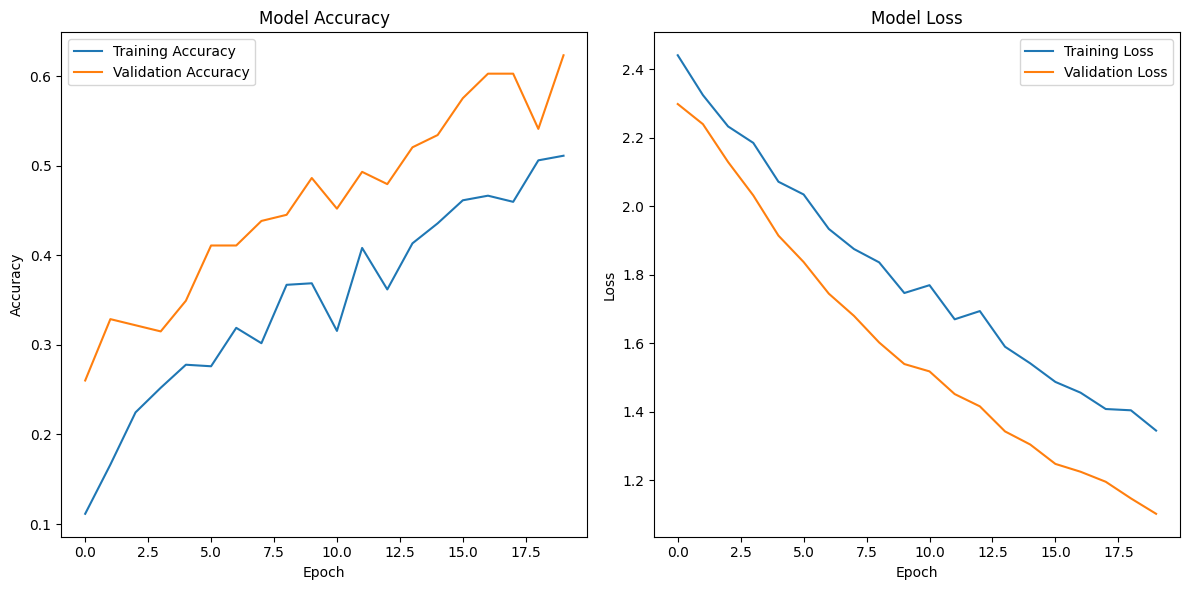

In [8]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plotting training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)


## Saving the Model 

In [9]:
model.save('bsl_model.keras')

## Real Time Testing and Prediction of BSL Alphabets

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('bsl_model.keras')

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            landmarks = []
            for landmark in hand_landmarks.landmark:
                landmarks.append(landmark.x)
                landmarks.append(landmark.y)
                landmarks.append(landmark.z)
            landmarks = np.array(landmarks).reshape(1, -1)
            prediction = model.predict(landmarks)
            predicted_letter = le.inverse_transform([np.argmax(prediction)])[0]
            cv2.putText(frame, predicted_letter, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('BSL Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━